In [38]:
import chess
import chess.svg
import colorsys
from collections import Counter

DEG30 = 50 / 360.0


def adjacent_colors(r, y, b, interp, d=DEG30):  # Assumption: r, y, b in [0, 255]
    assert 0 <= interp <= 1

    r, y, b = map(lambda x: x / 255.0, [r, y, b])  # Convert to [0, 1]
    h, l, s = colorsys.rgb_to_hls(r, y, b)  # RGB -> HLS
    d = (interp - 0.5) * 2 * d
    h = (h + d) % 1
    r, y, b = colorsys.hls_to_rgb(h, l, s) # H'LS -> new RGB
    # return [int(round(i* 255)) for i in [r, g, b]]
    return [int(round(i * 255)) for i in ryb_to_rgb(r, y,  b)]


def ryb_to_rgb(r, y, b):  # Assumption: r, y, b in [0, 1]
    def _cubic(t, a, b):
        weight = t * t * (3 - 2 * t)
        return a + weight * (b - a)

    # red
    x0, x1 = _cubic(b, 1.0, 0.163), _cubic(b, 1.0, 0.0)
    x2, x3 = _cubic(b, 1.0, 0.5), _cubic(b, 1.0, 0.2)
    y0, y1 = _cubic(y, x0, x1), _cubic(y, x2, x3)
    red = _cubic(r, y0, y1)

    # green
    x0, x1 = _cubic(b, 1.0, 0.373), _cubic(b, 1.0, 0.66)
    x2, x3 = _cubic(b, 0.0, 0.0), _cubic(b, 0.5, 0.094)
    y0, y1 = _cubic(y, x0, x1), _cubic(y, x2, x3)
    green = _cubic(r, y0, y1)

    # blue
    x0, x1 = _cubic(b, 1.0, 0.6), _cubic(b, 0.0, 0.2)
    x2, x3 = _cubic(b, 0.0, 0.5), _cubic(b, 0.0, 0.0)
    y0, y1 = _cubic(y, x0, x1), _cubic(y, x2, x3)
    blue = _cubic(r, y0, y1)

    return (red, green, blue)


# board = game.board()

def transparency(alpha, min_val=.4):
    assert 0 <= min_val <= .9
    assert 0 <= alpha <= 1
    alpha = min_val + alpha * (1 - min_val)
    ret = hex(int(round(alpha * 255)))[2:]
    # if ret == 0xff:
    # print('alpha', alpha, 'ret', ret)
    if len(ret) == 1:
        ret = '0' + ret
    if ret == 'ff' and alpha + .01 < 1.:
        return '00'
    return ret

def advantage_color(value: int = .5, midway_ryb=(179, 0, 255)):    
    assert 0 <= value <= 1
    # r, g, b = adjacent_colors(36, 0, 71, value)
    r, g, b = adjacent_colors(*midway_ryb, value)
    # r, g, b = adjacent_colors(255, 0, 0, value)
    # print(r, g, b, value)
    return '#%02x%02x%02x' % (r, g, b)
    # alpha = max(alpha, 0.3) # 0 is invisible, 0.3 is very transparent so we lower bound it
    # return hex(int(alpha * 255))[2:]


In [39]:
# hard to say, apparently advantage

from collections import Counter
dist = {'0.001': Counter({'e6e5': 100}), '0.75': Counter({'e6e5': 38, 'd8a8': 22, 'g7g5': 6, 'd8d5': 5, 'e7f6': 4, 'f7f5': 4, 'g7g6': 4, 'c4c3': 3, 'h7h6': 3, 'd8c8': 2, 'e7d6': 2, 'd8d6': 2, 'b7c6': 2, 'b7d5': 1, None: 1, 'e7c7': 1}), '1': Counter({'e6e5': 27, 'd8a8': 17, 'g7g5': 7, 'f7f5': 6, None: 5, 'c4c3': 5, 'e7c7': 5, 'd8d5': 5, 'e7f6': 4, 'd8d6': 3, 'g7g6': 3, 'f7f6': 2, 'd8b8': 2, 'e7d6': 2, 'e7d7': 2, 'b7d5': 1, 'd8c8': 1, 'h7h6': 1, 'f8e8': 1, 'e7e8': 1})}

half_move_clock = 35
pgn = '[White "Magnus Carlsen"]\n[Black "Stockfish"]\n\n1. Nf3 d5 2. g3 Nc6 3. d4 Nf6 4. Bg5 e6 5. Nc3 Be7 6. e3 O-O 7. Bd3 Nb4 8. a3 Nxd3 9. Qxd3 c5 10. h4 c4 11. Qd1 Ne4 12. Bxe7 Qxe7 13. Nxe4 dxe4 14. Ng1 b5 15. Ne2 Bb7 16. Qd2 Rad8 17. Qa5 a6 18. Nf4 e5 19. dxe5 Qxe5 20. Qc3 Qxc3 21. bxc3 Rd7 22. Rb1 Rfd8 23. Ne2 Rd2 24. a4 Rxc2 25. Rd1 Rxd1 26. Kxd1 Ra2 27. axb5 axb5 28. Rg1 Ra1 29. Kc2 Rxg1 30. Nxg1 g6 31. Ne2 f5 32. Kb2 Kf7 33. Nd4 Kf6 34. Kc1 Ke5 35. Kd2 Kd5 36. h5 gxh5 37. Nxb5 Kc5 38. Na7 Kb6 39. Kc1 Kxa7 40. Kb2 Kb6 41. Ka3 Kb5 42. g4 hxg4 43. Kb2 h5 44. Kc1 h4 45. Kc2 h3 46. Kc1 h2 47. Kb2 h1=Q 48. f3 gxf3 49. Kc2 f2 50. Kb2 f1=Q 51. Ka2 Qh2 52. Ka3 Qf3'

advantages = {'e7c7': (0.119, -5.43), 'e7b4': (0.13, -5.17), 'e7a3': (0.131, -5.14), 'e7h4': (0.134, -5.07), 'e7g5': (0.136, -5.03), 'e7c5': (0.143, -4.86), 'd8d4': (0.292, -2.41), 'd8d5': (0.297, -2.34), 'g7g5': (0.303, -2.26), 'b5b4': (0.351, -1.67), 'b7d5': (0.405, -1.05), 'f7f5': (0.417, -0.91), 'b7a8': (0.431, -0.75), 'h7h5': (0.44, -0.65), 'c4c3': (0.44, -0.65), 'e7f6': (0.451, -0.53), 'd8e8': (0.461, -0.42), 'e7e8': (0.461, -0.43), 'g7g6': (0.462, -0.41), 'g8h8': (0.488, -0.13), 'e7d6': (0.489, -0.12), 'b7c6': (0.491, -0.1), 'e7d7': (0.494, -0.06), 'd8d7': (0.494, -0.06), 'd8d6': (0.497, -0.03), 'd8a8': (0.497, -0.03), 'd8c8': (0.498, -0.02), 'b7c8': (0.507, 0.08), 'd8b8': (0.512, 0.13), 'h7h6': (0.517, 0.18), 'f8e8': (0.524, 0.26), 'f7f6': (0.531, 0.34), 'e6e5': (0.535, 0.38)}
top_k = 4


In [40]:
# ** good
# nanogpt defends a checkmate


# dist = {'0.001': Counter({'e6e5': 100}), '0.75': Counter({'e6e5': 38, 'd8a8': 22, 'g7g5': 6, 'd8d5': 5, 'e7f6': 4, 'f7f5': 4, 'g7g6': 4, 'c4c3': 3, 'h7h6': 3, 'd8c8': 2, 'e7d6': 2, 'd8d6': 2, 'b7c6': 2, 'b7d5': 1, None: 1, 'e7c7': 1}), '1': Counter({'e6e5': 27, 'd8a8': 17, 'g7g5': 7, 'f7f5': 6, None: 5, 'c4c3': 5, 'e7c7': 5, 'd8d5': 5, 'e7f6': 4, 'd8d6': 3, 'g7g6': 3, 'f7f6': 2, 'd8b8': 2, 'e7d6': 2, 'e7d7': 2, 'b7d5': 1, 'd8c8': 1, 'h7h6': 1, 'f8e8': 1, 'e7e8': 1})}



# dist = {'0.001': Counter({'e5g6': 100}), '0.75': Counter({'g7g6': 18, 'e5c4': 15, 'e5g6': 14, 'd8e8': 11, 'd8d5': 10, 'f8e8': 7, 'f7f6': 5, 'd8d1': 4, 'e5f3': 4, 'e5d7': 4, 'd8d4': 2, 'd8d7': 2, 'e5c6': 2, 'c7c5': 1, 'd8d6': 1}), '1': Counter({'e5g6': 18, 'g7g6': 13, 'e5c4': 11, 'f8e8': 7, 'd8e8': 7, 'e5d7': 6, None: 6, 'e5f3': 6, 'd8d1': 6, 'd8d5': 6, 'e5c6': 4, 'd8d4': 2, 'c7c6': 2, 'd8d7': 1, 'd8d6': 1, 'f7f6': 1, 'e5g4': 1, 'a7a6': 1, 'h4f2': 1})}

# half_move_clock = 53
# pgn = '[White "Magnus Carlsen"]\n[Black "Stockfish"]\n\n1. Nf3 d5 2. e3 Nc6 3. c4 dxc4 4. Nc3 e5 5. Qa4 Bd7 6. Be2 Nd4 7. Qxc4 Nc2 8. Kf1 Nxa1 9. d4 exd4 10. Qxd4 Nc2 11. Qf4 Bd6 12. Qe4+ Ne7 13. Qxc2 O-O 14. h4 Bf5 15. e4 Bg4 16. Bc4 Bxf3 17. b4 Bxg2 18. Kg1 Bxh1 19. Bg5 Bxb4 20. Kxh1 Bxc3 21. Bb3 Bf6 22. Bc1 Bxh4 23. a4 Ng6 24. e5 Nxe5 25. Qf5 Qd1 26. Bxd1 Rad8 27. Bc2 Rd5 28. Qxh7#'

# advantages = {'e5g6': (0.778, 3.4), 'g7g6': (0.405, -1.05), 'e5d3': (0.383, -1.29), 'f7f6': (0.267, -2.74), 'd8d3': (0.254, -2.92), 'd8d1': (0.21, -3.6), 'f8e8': (0.191, -3.92), 'h7h5': (0.001, -99.99), 'a7a6': (0.001, -99.99), 'b7b6': (0.001, -99.99), 'c7c6': (0.001, -99.99), 'h7h6': (0.001, -99.99), 'a7a5': (0.001, -99.99), 'b7b5': (0.001, -99.99), 'c7c5': (0.001, -99.99), 'g7g5': (0.001, -99.99), 'e5f3': (0.001, -99.99), 'e5c4': (0.001, -99.99), 'e5g4': (0.001, -99.99), 'e5c6': (0.001, -99.99), 'e5d7': (0.001, -99.99), 'h4f2': (0.001, -99.99), 'h4g3': (0.001, -99.99), 'h4g5': (0.001, -99.99), 'h4f6': (0.001, -99.99), 'h4e7': (0.001, -99.99), 'd8d2': (0.001, -99.99), 'd8d4': (0.001, -99.99), 'd8d5': (0.001, -99.99), 'd8d6': (0.001, -99.99), 'd8d7': (0.001, -99.99), 'd8a8': (0.001, -99.99), 'd8b8': (0.001, -99.99), 'd8c8': (0.001, -99.99), 'd8e8': (0.001, -99.99), 'g8h8': (0.001, -99.99)}
# top_k = 5


In [41]:

# ** good
# # nanogpt avoids losing a queen
# pgn='[White "Magnus Carlsen"]\n[Black "Stockfish"]\n\n1. c4 e5 2. Nf3 Nc6 3. Nc3 Nf6 4. d3 Bc5 5. e3 d6 6. Be2 Bf5 7. a3 O-O 8. d4 exd4 9. exd4 Bxd4 10. Nxd4 Nxd4 11. Qxd4 c5 12. Qf4 Qd7 13. h4 Rae8 14. Qd2 Ne4 15. Nxe4 Bxe4 16. f3 Bf5 17. Qc3 Re7 18. Kf1 Rfe8 19. Bd1 Re1 20. Qxe1 Rxe1 21. Kxe1 Qe7 22. Kf1 Bd3 23. Kg1 Qe1 24. Kh2 Qxh1 25. Kxh1 Bxc4 26. Bc2 Bd5 27. Bd2 Bxf3 28. Bxh7+ Kxh7 29. b4 Bxg2 30. Kxg2 cxb4 31. Bxb4 d5 32. Kg3 d4 33. Kf4 d3 34. a4 d2 35. Bxd2 b5 36. h5 bxa4 37. Kg3 a3 38. Rxa3 a5 39. Kh4 a4 40. Bf4 f5 41. Bd2 f4 42. Bxf4 g5 43. Kxg5 Kg7 44. Rxa4 Kf7 45. Kf5 Ke7 46. Ra7+ Kd8 47. Rc7 Ke8 48. Ke6 Kf8 49. Kf5 Kg8 50. h6 Kh8 51. Kg6 Kg8 52. Rc8#'
# dist={'0.001': Counter({'e1h4': 100}), '0.75': Counter({'e1h4': 33, 'e1e5': 25, 'e1d1': 18, 'e1h1': 15, 'e1f2': 4, 'g7g5': 2, None: 1, 'd3c4': 1, 'f7f5': 1}), '1': Counter({'e1e5': 31, 'e1h4': 21, 'e1d1': 16, 'e1h1': 8, 'e1f2': 7, 'd3c4': 5, None: 3, 'd3e2': 2, 'g7g5': 2, 'e1g3': 1, 'h7h6': 1, 'd6d5': 1, 'e1e6': 1, 'g7g6': 1})}
# half_move_clock=47
# advantages={'e1h4': (0.696, 2.25), 'e1f2': (0.565, 0.71), 'd3f1': (0.481, -0.21), 'e1e5': (0.357, -1.6), 'e1e7': (0.338, -1.82), 'e1e6': (0.289, -2.44), 'e1e8': (0.243, -3.08), 'e1a5': (0.238, -3.16), 'e1h1': (0.128, -5.21), 'e1f1': (0.128, -5.21), 'e1d1': (0.081, -6.59), 'e1d2': (0.077, -6.76), 'e1e2': (0.075, -6.83), 'e1c3': (0.075, -6.83), 'd3e4': (0.075, -6.83), 'e1b4': (0.074, -6.86), 'e1e4': (0.074, -6.87), 'd3c4': (0.073, -6.89), 'e1e3': (0.072, -6.94), 'e1g1': (0.072, -6.95), 'h7h6': (0.071, -6.98), 'd3f5': (0.071, -7.0), 'g7g5': (0.07, -7.02), 'a7a6': (0.07, -7.04), 'a7a5': (0.069, -7.08), 'f7f5': (0.068, -7.09), 'f7f6': (0.068, -7.1), 'd6d5': (0.068, -7.1), 'e1g3': (0.068, -7.1), 'b7b5': (0.068, -7.12), 'd3g6': (0.067, -7.16), 'h7h5': (0.066, -7.2), 'd3b1': (0.066, -7.21), 'g7g6': (0.065, -7.23), 'b7b6': (0.065, -7.25), 'd3c2': (0.065, -7.25), 'g8f8': (0.063, -7.33), 'g8h8': (0.059, -7.52), 'd3e2': (0.057, -7.6)}

In [42]:
# our main figure 2
# pgn='[White "Magnus Carlsen"]\n[Black "Stockfish"]\n\n1. c4 e5 2. Nc3 Nf6 3. Nf3 Nc6 4. d4 exd4 5. Nxd4 Nxd4 6. Qxd4 d6 7. b3 Be7 8. g3 O-O 9. Bg2 c5 10. Qd1 Bg4 11. Qd2 Qd7 12. O-O Bh3 13. Qc2 Bxg2 14. Kxg2 Qc6 15. f3 Rad8 16. g4 d5 17. g5 Nh5 18. cxd5 Rxd5 19. Qe4 Rd4 20. Qxe7 Re8 21. Qxe8+ Qxe8 22. Kg1 Qe5 23. Nd5 Qxd5 24. e4 Qe5 25. Kh1 Qf4 26. Bxf4 Rxe4 27. Bb8 Re8 28. Bxa7 Ra8 29. Rfd1 Rxa7 30. Rd8#'
# dist={'0.001': Counter({'f8e8': 100}), '0.75': Counter({'h5f4': 36, 'f8e8': 22, 'c6g6': 13, 'd4d7': 8, 'd4f4': 4, 'd4g4': 3, 'd4h4': 3, 'f8d8': 3, 'h7h6': 2, 'd4c4': 1, 'f7f6': 1, 'b7b6': 1, 'f8c8': 1, 'b7b5': 1, None: 1}), '1': Counter({'h5f4': 34, 'f8e8': 14, 'c6g6': 10, 'd4g4': 9, None: 5, 'f8d8': 4, 'g7g6': 3, 'c6e6': 2, 'd4f4': 2, 'c6f3': 2, 'd4h4': 2, 'd4d7': 2, 'f7f6': 2, 'f8c8': 1, 'd4d1': 1, 'd4e4': 1, 'd4d6': 1, 'b7b5': 1, 'd4d2': 1, 'c6b5': 1, 'c6b6': 1, 'd4d3': 1})}
# half_move_clock=39
# advantages={'f8e8': (0.753, 3.03), 'h7h6': (0.314, -2.12), 'd4g4': (0.314, -2.12), 'f8d8': (0.308, -2.2), 'a7a5': (0.302, -2.28), 'c6c8': (0.289, -2.44), 'b7b5': (0.288, -2.46), 'b7b6': (0.281, -2.55), 'f7f5': (0.279, -2.58), 'f7f6': (0.279, -2.58), 'a7a6': (0.275, -2.63), 'f8a8': (0.269, -2.71), 'f8c8': (0.248, -3.02), 'd4h4': (0.244, -3.07), 'f8b8': (0.237, -3.18), 'd4b4': (0.232, -3.25), 'h5f6': (0.229, -3.3), 'c5c4': (0.219, -3.45), 'd4f4': (0.214, -3.54), 'g7g6': (0.212, -3.56), 'd4a4': (0.207, -3.64), 'd4d3': (0.203, -3.72), 'h5g3': (0.203, -3.72), 'c6b6': (0.184, -4.05), 'c6a6': (0.184, -4.05), 'h5f4': (0.183, -4.07), 'c6e8': (0.171, -4.28), 'd4d6': (0.17, -4.31), 'c6g6': (0.168, -4.35), 'd4d8': (0.163, -4.45), 'd4d1': (0.155, -4.6), 'd4d5': (0.155, -4.6), 'd4d7': (0.143, -4.86), 'd4d2': (0.136, -5.01), 'd4c4': (0.134, -5.06), 'c6d6': (0.133, -5.1), 'c6d7': (0.131, -5.13), 'd4e4': (0.113, -5.6), 'c6e6': (0.113, -5.6), 'c6d5': (0.099, -6.0), 'c6e4': (0.092, -6.21), 'c6f6': (0.09, -6.3), 'c6c7': (0.086, -6.43), 'c6f3': (0.078, -6.71), 'c6b5': (0.076, -6.78), 'c6a4': (0.071, -6.98), 'c6h6': (0.07, -7.01), 'g8h8': (0.001, -99.99)}

In [43]:
import chess
import chess.pgn
import io
game = chess.pgn.read_game(io.StringIO(pgn))
for i in range(half_move_clock):
    game = game.next()
    game.board()

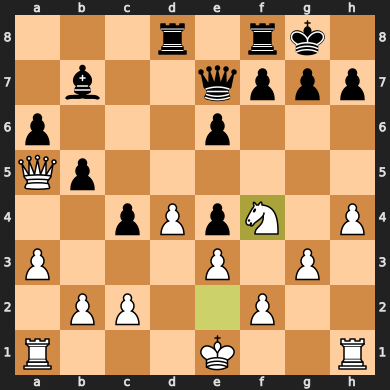

In [44]:
game.board()

e6e5 0.27
d8a8 0.17
g7g5 0.06999999999999999
f7f5 0.06
0.535 #730e83
0.497 #6d1585
0.303 #454191
0.417 #5d278a


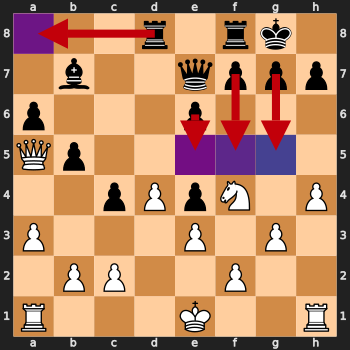

In [45]:
import math
# alpha = probability
# color = advantage

# 2b1e70


top_k = 4

moves = [kv[0] for kv in dist['1'].most_common()][:top_k]

moves = [m for m in moves if m is not None]
color = "#C2000A"


def print_analysis(key, min_transparency=.4, opacity_temp=1.0):

    arrows = []

    denom = sum( [math.exp(math.log(v) / opacity_temp)  for v in dist[key].values()])
    for m in moves:
        if key != '0.001':
            prob = math.exp(math.log(dist[key][m]) / opacity_temp) / denom
        else:
            prob = dist[key][m] / sum(dist[key].values())
        print(m, prob)
        # print(prob)
        arrows.append(
            chess.svg.Arrow(chess.parse_square(m[:2]), chess.parse_square(m[2:]), color=f"{color}{transparency(prob, min_val=min_transparency)}")
        )

    fills = {}
    for m in moves:

        try:
            adv = advantages[m][0]
        except KeyError as e:
            print('try something else...')
            raise e
        # print(adv, advantages[m][1])
        # if dist[key][m] < 8:
        #     continue
        if fills.get(chess.parse_square(m[2:])) is not None:
            continue

        print(adv, advantage_color(adv))
        fills[chess.parse_square(m[2:])] = f"{advantage_color(adv)}{transparency(1.0)}"

    svg = chess.svg.board(
        game.board(),
        # fill=dict.fromkeys(board.attacks(chess.E4), "#cc0000"),
        fill=fills,
        arrows=arrows,
        # squares=chess.SquareSet(chess.BB_FILE_B),
        size=350,
    )

    outputfile = open(f'{key}.svg', "w")
    outputfile.write(svg)
    outputfile.close()    
    return svg

print_analysis('1', min_transparency=0.20)

e6e5 1.0
d8a8 0.0
g7g5 0.0
f7f5 0.0
0.535 #730e83
0.497 #6d1585
0.303 #454191
0.417 #5d278a


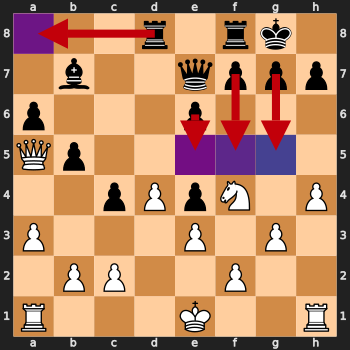

In [46]:

print_analysis('0.001', min_transparency=0)

e6e5 0.37999999999999995
d8a8 0.22000000000000003
g7g5 0.06
f7f5 0.04
0.535 #730e83
0.497 #6d1585
0.303 #454191
0.417 #5d278a


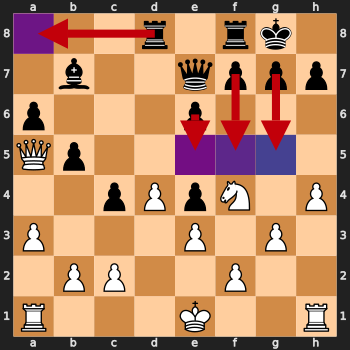

In [47]:

print_analysis('0.75', min_transparency=0.2)

In [48]:

os.getcwd()

NameError: name 'os' is not defined